<a href="https://colab.research.google.com/github/ralphafold/election2020/blob/master/Poll_visualization_package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Importing libraries
#@markdown Pandas, Numpy, MatPlotLib and Seaborn imported for plotting.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')
# Create an array with the colors you want to use
warren_colors = ["#232542", "#B21F2E","#B9E3D0","#CF6C4D","#585A91","#36635A","#EEB211","#1DAEEC","#E9168B","#6DBE52"]
# Set your custom color palette
warren = sns.set_palette(sns.color_palette(warren_colors))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
#@title Importing Raw Poll CSVs
#@markdown General Presidential(potus), Presidential primary (primary), Senate(senate), House(house), Presidential Approval(pop), Governor polls (governor) & generic congressional (gen_con) Dataframes 

#Grabbing urls for the 538 Polls
potus_primary_url = 'https://projects.fivethirtyeight.com/polls-page/president_primary_polls.csv'
potus_general_url = 'https://projects.fivethirtyeight.com/polls-page/president_polls.csv'
senate_url = 'https://projects.fivethirtyeight.com/polls-page/senate_polls.csv'
house_url = 'https://projects.fivethirtyeight.com/polls-page/house_polls.csv'
state_gov_url = 'https://projects.fivethirtyeight.com/polls-page/governor_polls.csv'
potus_pop_url = 'https://projects.fivethirtyeight.com/polls-page/president_approval_polls.csv'
generic_congress_url = 'https://projects.fivethirtyeight.com/polls-page/generic_ballot_polls.csv'

#Creating Dataframe objects by loading CSV's into memory
potus = pd.read_csv(potus_general_url,parse_dates = [17,18,24])
primary = pd.read_csv(potus_primary_url,parse_dates = [17,18,24])
senate = pd.read_csv(senate_url,parse_dates = [17,18,24])
house = pd.read_csv(house_url,parse_dates = [17,18,24])
governor = pd.read_csv(state_gov_url,parse_dates = [17,18,24])
pop = pd.read_csv(potus_pop_url,parse_dates = [17,18,24])
gen_con = pd.read_csv(generic_congress_url,parse_dates = [17,18,24])


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#@markdown Dictionary for US State Abbreviations: us_state_abbrev
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [44]:
#@markdown Converting states to 2 Letter codes. Remapping states and seats into Congressional districts. 
potus = potus.replace({'state':us_state_abbrev})
potus['state'] = potus['state'].fillna('Nat') 
senate = senate.replace({'state':us_state_abbrev})
house = house.replace({'state':us_state_abbrev})
governor = governor.replace({'state':us_state_abbrev})
house['district'] = house['state'] + house['seat_number'].astype(str)

In [6]:
#@title US House Races Plotting Functions:
#Note: Figure out how to add cycle. What other arguments do I need to include?
#@markdown - take_district(district): creates new dataframe for district
def take_district(district_name):
  dname = district_name
  district = house.loc[house['district'] == dname]
  district = pd.DataFrame(district)
  return district
#@markdown - plot_all_polls_for_district(district): makes line plot of polls for district
#Note: Figure out how to add  
def plot_all_polls_for_district(district):
  plt.figure(figsize=(8, 6))
  sns.set(font_scale=1.0)
  polls = take_district(district)
  ax = sns.lineplot(x="end_date", y="pct", hue="answer", data=polls, markers= True, dashes= True, palette = warren_colors)
  ax.set(ylim=(0, 80),xlabel='Candidate',ylabel='Percent')
#@markdown - plot_latest_house_poll(district): make bar plots of latest polls for district
#Note: Figure out how to auto resize width based on the number of candidates
def plot_latest_house_poll(district):
  sns.set(font_scale=1.0)
  polls = take_district(district)
  last_poll_id = polls['poll_id'].max()
  last_poll = polls.loc[polls['poll_id'] == last_poll_id]
  date = last_poll['end_date'].max()
  n_candidates = len(last_poll['answer'].unique())
  width = float(n_candidates)*2
  plt.figure(figsize=(width, 6))
  pollster = last_poll['display_name'].iloc[0]
  ax = sns.barplot(x="answer", y="pct", data = last_poll, palette= warren_colors)
  ax.set(ylim=(0, 80),xlabel='Candidate',ylabel='Percent')
  title = str(district)+', '+str(date)
  ax.text(-0.2, 76.0, pollster , fontsize=12)
  ax.set_title(title)
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 25), textcoords = 'offset points')


In [7]:
#@title US Senate Races Plotting Functions:
def take_senate_race(state):
  state = state
  senate_race = senate.loc[senate['state'] == state]
  senate_race = pd.DataFrame(senate_race)
  return senate_race
#@markdown - plot_all_polls_for_district(state): makes line plot of polls for district
#Note: Figure out how to add  
def plot_all_polls_for_senate_race(state):
  plt.figure(figsize=(8, 6))
  sns.set(font_scale=1.0)
  polls = take_senate_race(state)
  ax = sns.lineplot(x="end_date", y="pct", hue="answer", data=polls, markers= True, dashes= True, palette = warren_colors)
  ax.set(ylim=(0, 80),xlabel='Candidate',ylabel='Percent')
#@markdown - plot_latest_senate_poll(state): make bar plots of latest polls for district
def plot_latest_senate_poll(state):
  sns.set(font_scale=1.5)
  polls = take_senate_race(state)
  last_poll_id = polls['poll_id'].max()
  last_poll = polls.loc[polls['poll_id'] == last_poll_id]
  n_candidates = len(last_poll['answer'].unique())
  width = float(n_candidates)*2
  plt.figure(figsize=(width, 8))
  date = last_poll['end_date'].max()
  ax = sns.barplot(x="answer", y="pct", data = last_poll, palette= warren_colors)
  ax.set(ylim=(0, 80),xlabel='Candidate',ylabel='Percent')
  title = str(state)+', '+str(date)
  pollster = last_poll['display_name'].iloc[0]
  ax.set_title(title)
  ax.text(-0.2, 76.0, pollster , fontsize=12)
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 25), textcoords = 'offset points')

In [80]:
#@title Bar plots for latest Presidential polls
#@markdown plot_latest_potus_poll(state): leave blank for national polls
def plot_latest_potus_poll(state='Nat'):  
  sns.set(font_scale=1.2)
  all_polls = potus
  polls = all_polls.loc[all_polls['state'] == state]
  last_poll_id = polls['poll_id'].max()
  last_poll = polls.loc[polls['poll_id'] == last_poll_id]
  date = last_poll['end_date'].max()
  pollster = last_poll['display_name'].iloc[0]
  n_candidates = len(last_poll['answer'].unique())
  width = float(n_candidates)*2
  plt.figure(figsize=(width, 8))
  ax = sns.barplot(x="answer", y="pct", data = last_poll, palette= warren_colors)
  ax.set(ylim=(0, 70),xlabel='Candidate',ylabel='Percent')
  title = 'National Polls, '+str(date)
  ax.set_title(title)
  ax.text(-0.48, 68.0, pollster , fontsize=10)
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 25), textcoords = 'offset points')

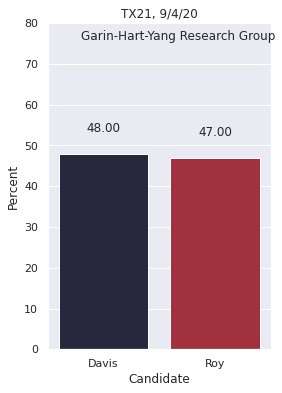

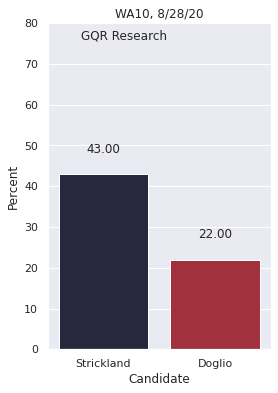

In [9]:
plot_latest_house_poll('TX21')

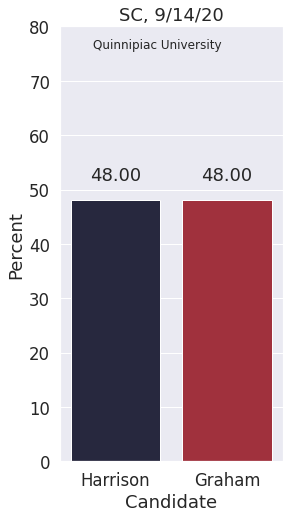

In [98]:
# How to use: add states (2 letter code) inside function.
plot_latest_senate_poll('SC')

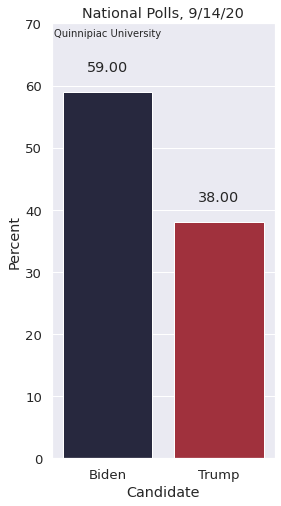

In [88]:
# Example for presidential poll:
plot_latest_potus_poll('ME')